# Support Vector Regression (SVR)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('./Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = dataset.iloc[:, 1:2].values  # 1:2 to make x a matrix wich is needed for the model input.
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = dataset.iloc[:, 2:3].values # matrix need for standard scaler 
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### => Feature Scalling

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_obj_x = StandardScaler()
sc_obj_y = StandardScaler()
x_sc = sc_obj_x.fit_transform(x)
y_sc = sc_obj_y.fit_transform(y)

In [6]:
print(x_sc)
print("-----------------------------")
print(y_sc)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
-----------------------------
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
y_sc.ravel() # to make y a vector again to avoid warning in the fit method

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [8]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_sc, y_sc.ravel())

SVR()

In [9]:
print(type(sc_obj_x.transform([[6.5]])))

<class 'numpy.ndarray'>


In [10]:
# Predicting a new result
y_pred = sc_obj_y.inverse_transform(regressor.predict(sc_obj_x.transform(np.array([[6.5]]))).reshape(1, -1))    

y_pred


array([[170370.0204065]])

In [11]:
# Different way to predict a new result
print(sc_obj_x.transform(np.array([[6.5]])).reshape(1, -1).ndim)
print(sc_obj_x.transform(np.array([[6.5]])).ndim)
print(sc_obj_x.transform([[6.5]]).ndim)
print(sc_obj_x.transform([[6.5]]).ndim)

2
2
2
2


In [12]:
x
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

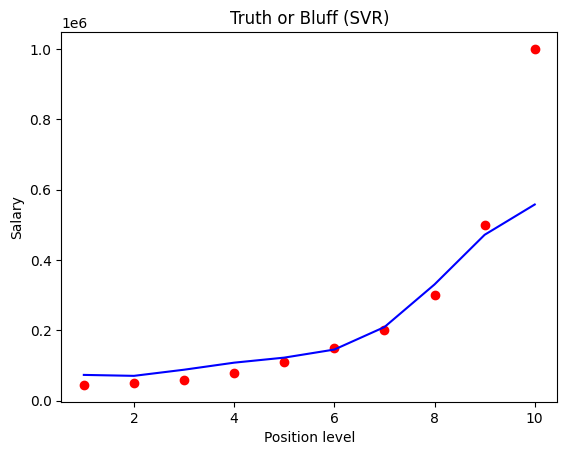

In [13]:
# Visualising the SVR results
plt.scatter(x, y,color='red')
plt.plot(x, sc_obj_y.inverse_transform(regressor.predict(x_sc).reshape(-1,1)), color='blue')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [14]:
x_grid = np.arange(np.min(x), np.max(x), 0.1)
# x_grid = x_grid.reshape((len(x_grid), 1))
x_grid = x_grid.reshape((-1, 1))
# x_grid

In [15]:
# # Test if the two reshape are the same

# x_grid.reshape((len(x_grid), 1)) == x_grid.reshape((-1, 1))

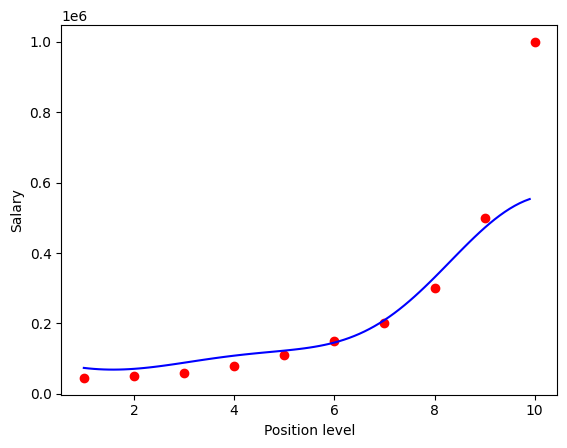

In [16]:
plt.scatter(x, y, color='red')
plt.plot(x_grid,sc_obj_y.inverse_transform(regressor.predict(sc_obj_x.transform(x_grid)).reshape(-1,1)), color='blue')

plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()